In [1]:
import qiskit
versions = qiskit.__version__
print("The version of Qiskit is",versions)


The version of Qiskit is 2.1.1


In [2]:
!pip install "qiskit[visualization]">=1.0 --user

┌───┐┌───────────────┐┌───┐ ░ ┌─┐            
q_0: ────────────┤ X ├┤ U(2π/7,0,0,0) ├┤ X ├─░─┤M├────────────
        ┌───┐    └─┬─┘└───────┬───────┘└─┬─┘ ░ └╥┘┌─┐         
q_1: ───┤ H ├──────■──────────■──────────■───░──╫─┤M├─────────
        ├───┤                            │   ░  ║ └╥┘┌─┐      
q_2: ───┤ X ├────────────────────────────■───░──╫──╫─┤M├──────
     ┌──┴───┴───┐                            ░  ║  ║ └╥┘┌─┐   
q_3: ┤ Ry(2π/7) ├────────────────────────────░──╫──╫──╫─┤M├───
     └──┬───┬───┘                            ░  ║  ║  ║ └╥┘┌─┐
q_4: ───┤ Z ├────────────────────────────────░──╫──╫──╫──╫─┤M├
        └───┘                                ░  ║  ║  ║  ║ └╥┘
c: 5/═══════════════════════════════════════════╩══╩══╩══╩══╩═
                                                3  1  4  0  2

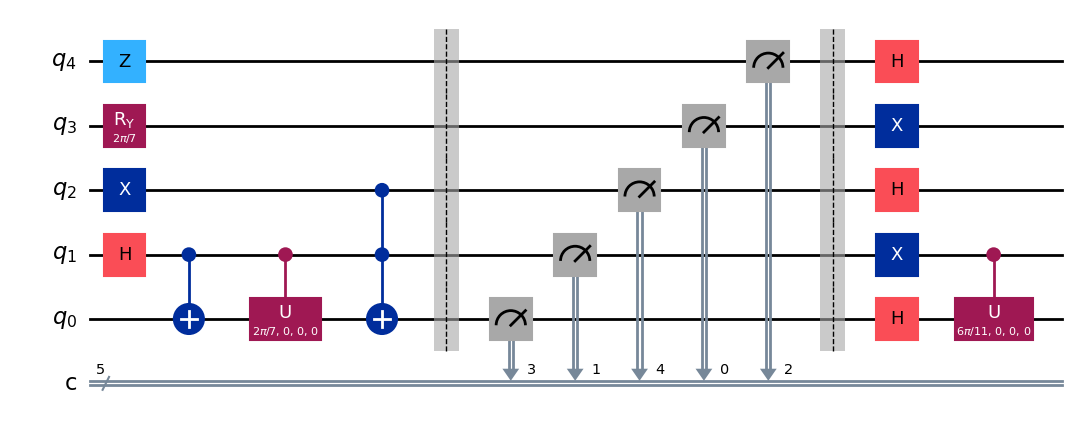

measurement outcomes are: {'10011': 67, '11010': 82, '10001': 107, '11011': 18, '10010': 312, '10000': 414}

unitary matrix is
[[ 0.   +0.j  0.   +0.j  0.532+0.j  0.847-0.j]
 [ 0.847+0.j -0.532+0.j  0.   +0.j  0.   +0.j]
 [ 0.532+0.j  0.847-0.j  0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.847+0.j -0.532+0.j]]

quantum state is
0.0+0.0j
0.847+0.0j
0.532+0.0j
0.0+0.0j

All looks fine :-)


In [4]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator, UnitarySimulator, StatevectorSimulator
from math import pi

# A quantum circuit is composed by a quantum and a classical register in Qiskit
q = QuantumRegister(5,"q") # this quantum register has 5 qubits
c = ClassicalRegister(5,"c") # this classical register has 5 classical bits

qc = QuantumCircuit(q,c) # a quantum circuit with quantum and classical registers q and c

qc.x(q[2]) # apply x-gate to the qubit "q[2]" of the quantum circuit "qc"
qc.z(q[4]) # apply z-gate to the qubit "q[4]" of the quantum circuit "qc"
qc.h(q[1]) # apply h-gate to the qubit "q[1]" of the quantum circuit "qc"

a = pi/7
qc.ry(2*a,q[3]) # apply ry-gate with the specified angle to the qubit "q[3]" of the quantum circuit "qc"

qc.cx(q[1],q[0]) # apply cx-gate to the qubits "q[1]" and "q[0]" of the quantum circuit "qc"

qc.cu(2*a,0,0,0,q[1],q[0]) # apply controlled rotation operator with the specified angle 
                          #  to the qubits "q[1]" and "q[0]" of the quantum circuit "qc"

qc.ccx(q[2],q[1],q[0]) # apply ccx-gate to the qubits "q[2]", "q[1]", and "q[0]" of the quantum circuit "qc"

qc.barrier()

qc.measure(q[0],c[3]) # measure q[0] and write the output on c[3]
qc.measure(q[1],c[1]) # measure q[1] and write the output on c[1]
qc.measure(q[2],c[4]) # measure q[2] and write the output on c[4]
qc.measure(q[3],c[0]) # measure q[3] and write the output on c[0]
qc.measure(q[4],c[2]) # measure q[4] and write the output on c[2]

display(qc.draw())

qc.barrier()

#qc.h(q[0]).c_if(c,5)
#qc.x(q[0]).c_if(c,3)
#qc.z(q[0]).c_if(c,1)

for i in range(5):
    if i % 2 ==0: qc.h(q[i])
    else: qc.x(q[i])
        
b = 3*pi/11
qc.cu(2*b,0,0,0,q[1],q[0])

display(qc.draw(output='mpl',reverse_bits=True))

job = AerSimulator().run(qc,shots=1000)
counts = job.result().get_counts(qc)   
print("measurement outcomes are:",counts)
print()

q = QuantumRegister(2,"q")
c = ClassicalRegister(2,"c")

qc = QuantumCircuit(q,c)

qc.h(q[0])
qc.ry(a,q[0])
qc.x(q[1])
qc.cx(q[0],q[1])

job = UnitarySimulator().run(qc,shots=1,optimization_level=0)
precision = 3
current_unitary=job.result().get_unitary(qc,precision).data

print("unitary matrix is")
print(current_unitary)
print()

job = StatevectorSimulator().run(qc,optimization_level=0)
precision = 3
current_quantum_state=job.result().get_statevector(qc,precision).data
print("quantum state is")
for val in current_quantum_state:
    print(str(val.real)+"+"+str(val.imag)+"j")

print()
print("All looks fine :-)")